# Student Performance Prediction

## About Dataset :

**Description:**

**The Student Performance Dataset is a dataset designed to examine the factors influencing academic student performance. The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.**

**Variables:**

**Hours Studied: The total number of hours spent studying by each student.**

**Previous Scores: The scores obtained by students in previous tests.**

**Extracurricular Activities: Whether the student participates in extracurricular activities (Yes or No).**

**Sleep Hours: The average number of hours of sleep the student had per day.**

**Sample Question Papers Practiced: The number of sample question papers the student practiced.**

### Target Variable:

**Performance Index: A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.**

**The dataset aims to provide insights into the relationship between the predictor variables and the performance index. Researchers and data analysts can use this dataset to explore the impact of studying hours, previous scores, extracurricular activities, sleep hours, and sample question papers on student performance**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [3]:
df.shape

(10000, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [5]:
#Check missing values
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [6]:
#Duplicate Values
df[df.duplicated()]

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
915,9,52,No,5,9,48.0
1477,7,61,Yes,6,8,54.0
1601,5,99,No,7,5,89.0
1786,2,62,Yes,9,4,40.0
2026,5,87,Yes,6,7,74.0
...,...,...,...,...,...,...
9644,4,91,Yes,4,3,71.0
9940,8,95,No,5,2,90.0
9954,6,97,No,8,7,92.0
9966,1,41,No,7,3,12.0


In [7]:
#Drop the duplicate Values
df = df.drop_duplicates()

In [8]:
df.head(3)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0


In [9]:
df['Hours Studied'].value_counts()

1    1133
6    1122
7    1118
3    1110
9    1099
2    1077
8    1074
4    1071
5    1069
Name: Hours Studied, dtype: int64

In [10]:
df['Extracurricular Activities'].value_counts()

No     4986
Yes    4887
Name: Extracurricular Activities, dtype: int64

In [11]:
df['Sleep Hours'].value_counts().index

Int64Index([8, 7, 6, 9, 4, 5], dtype='int64')

In [12]:
df['Sample Question Papers Practiced'].value_counts()

6    1046
9    1038
3    1020
5    1018
8    1016
1     969
7     967
4     945
0     937
2     917
Name: Sample Question Papers Practiced, dtype: int64

In [13]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

<AxesSubplot:xlabel='Sample Question Papers Practiced', ylabel='count'>

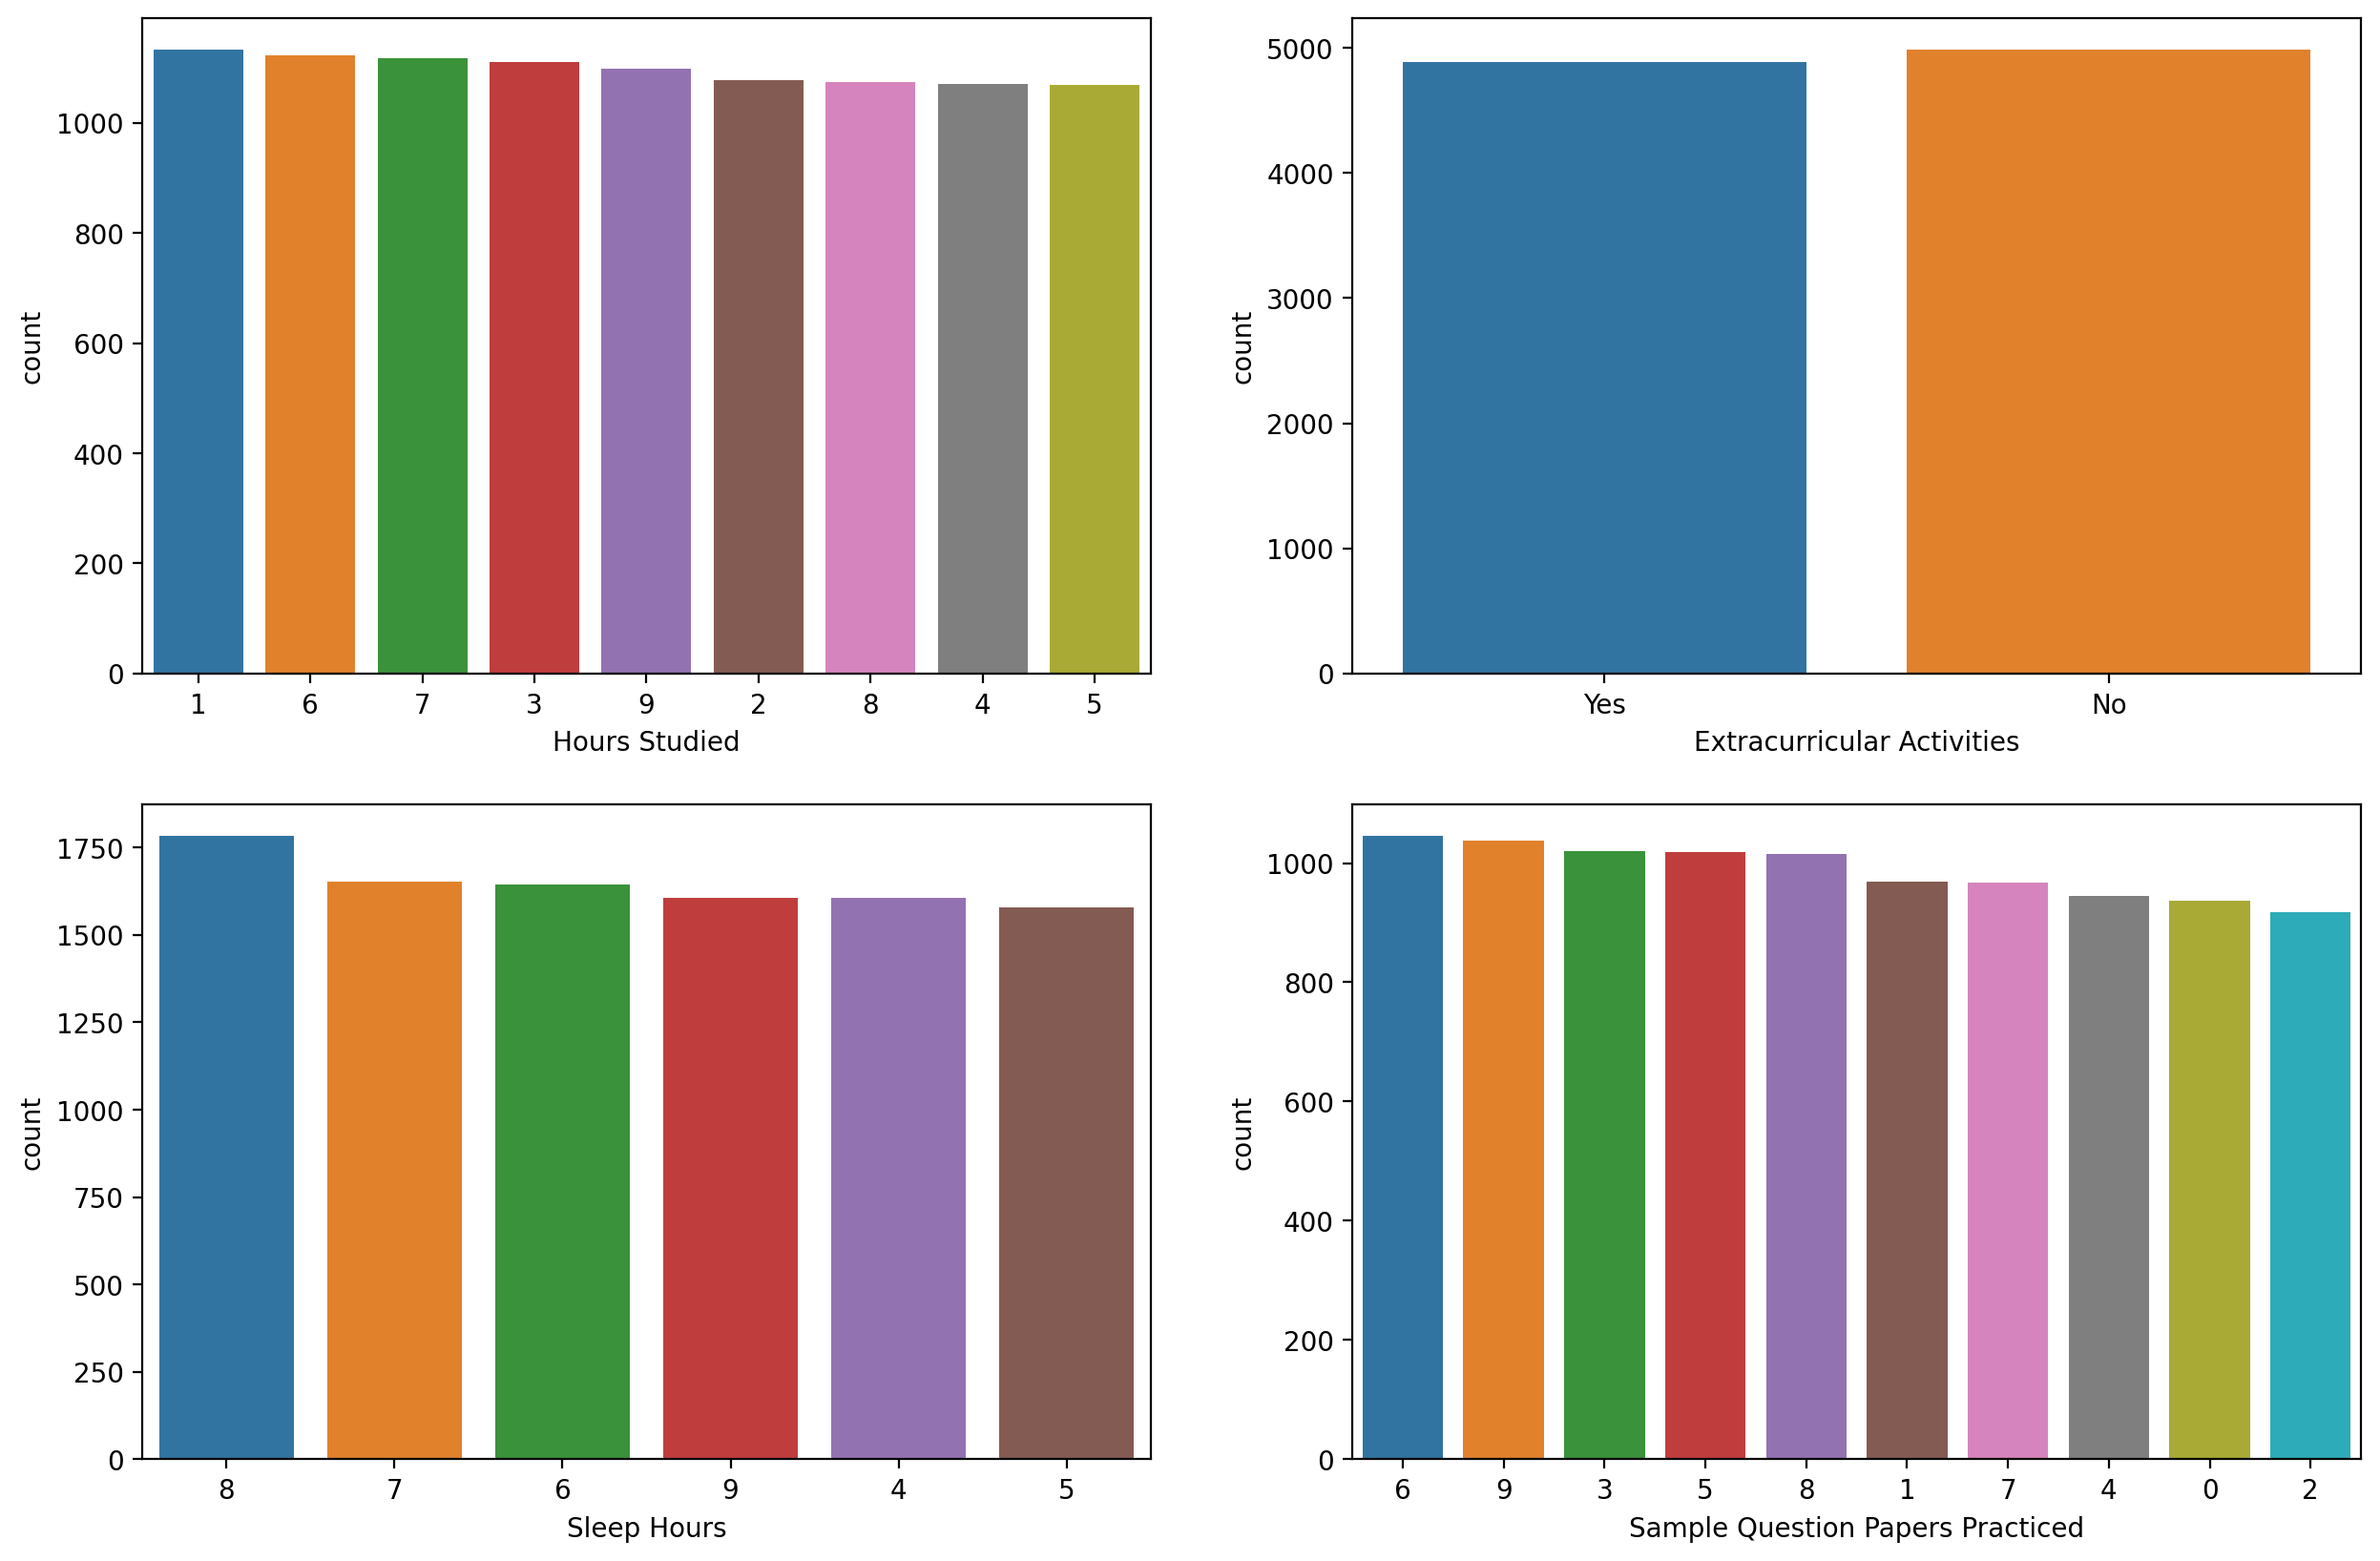

In [14]:
#The Value counts of the following features

plt.figure(figsize=(15,10),dpi=200)
plt.subplot(221)
sns.countplot(x= 'Hours Studied', data=df, order= df['Hours Studied'].value_counts().index)


plt.subplot(222)
sns.countplot(x= 'Extracurricular Activities', data=df)

plt.subplot(2,2,3)
sns.countplot(x= 'Sleep Hours', data=df, order=df['Sleep Hours'].value_counts().index)

plt.subplot(2,2,4)
sns.countplot(x= 'Sample Question Papers Practiced', data=df, order=df['Sample Question Papers Practiced'].value_counts().index)

<AxesSubplot:xlabel='Performance Index', ylabel='Count'>

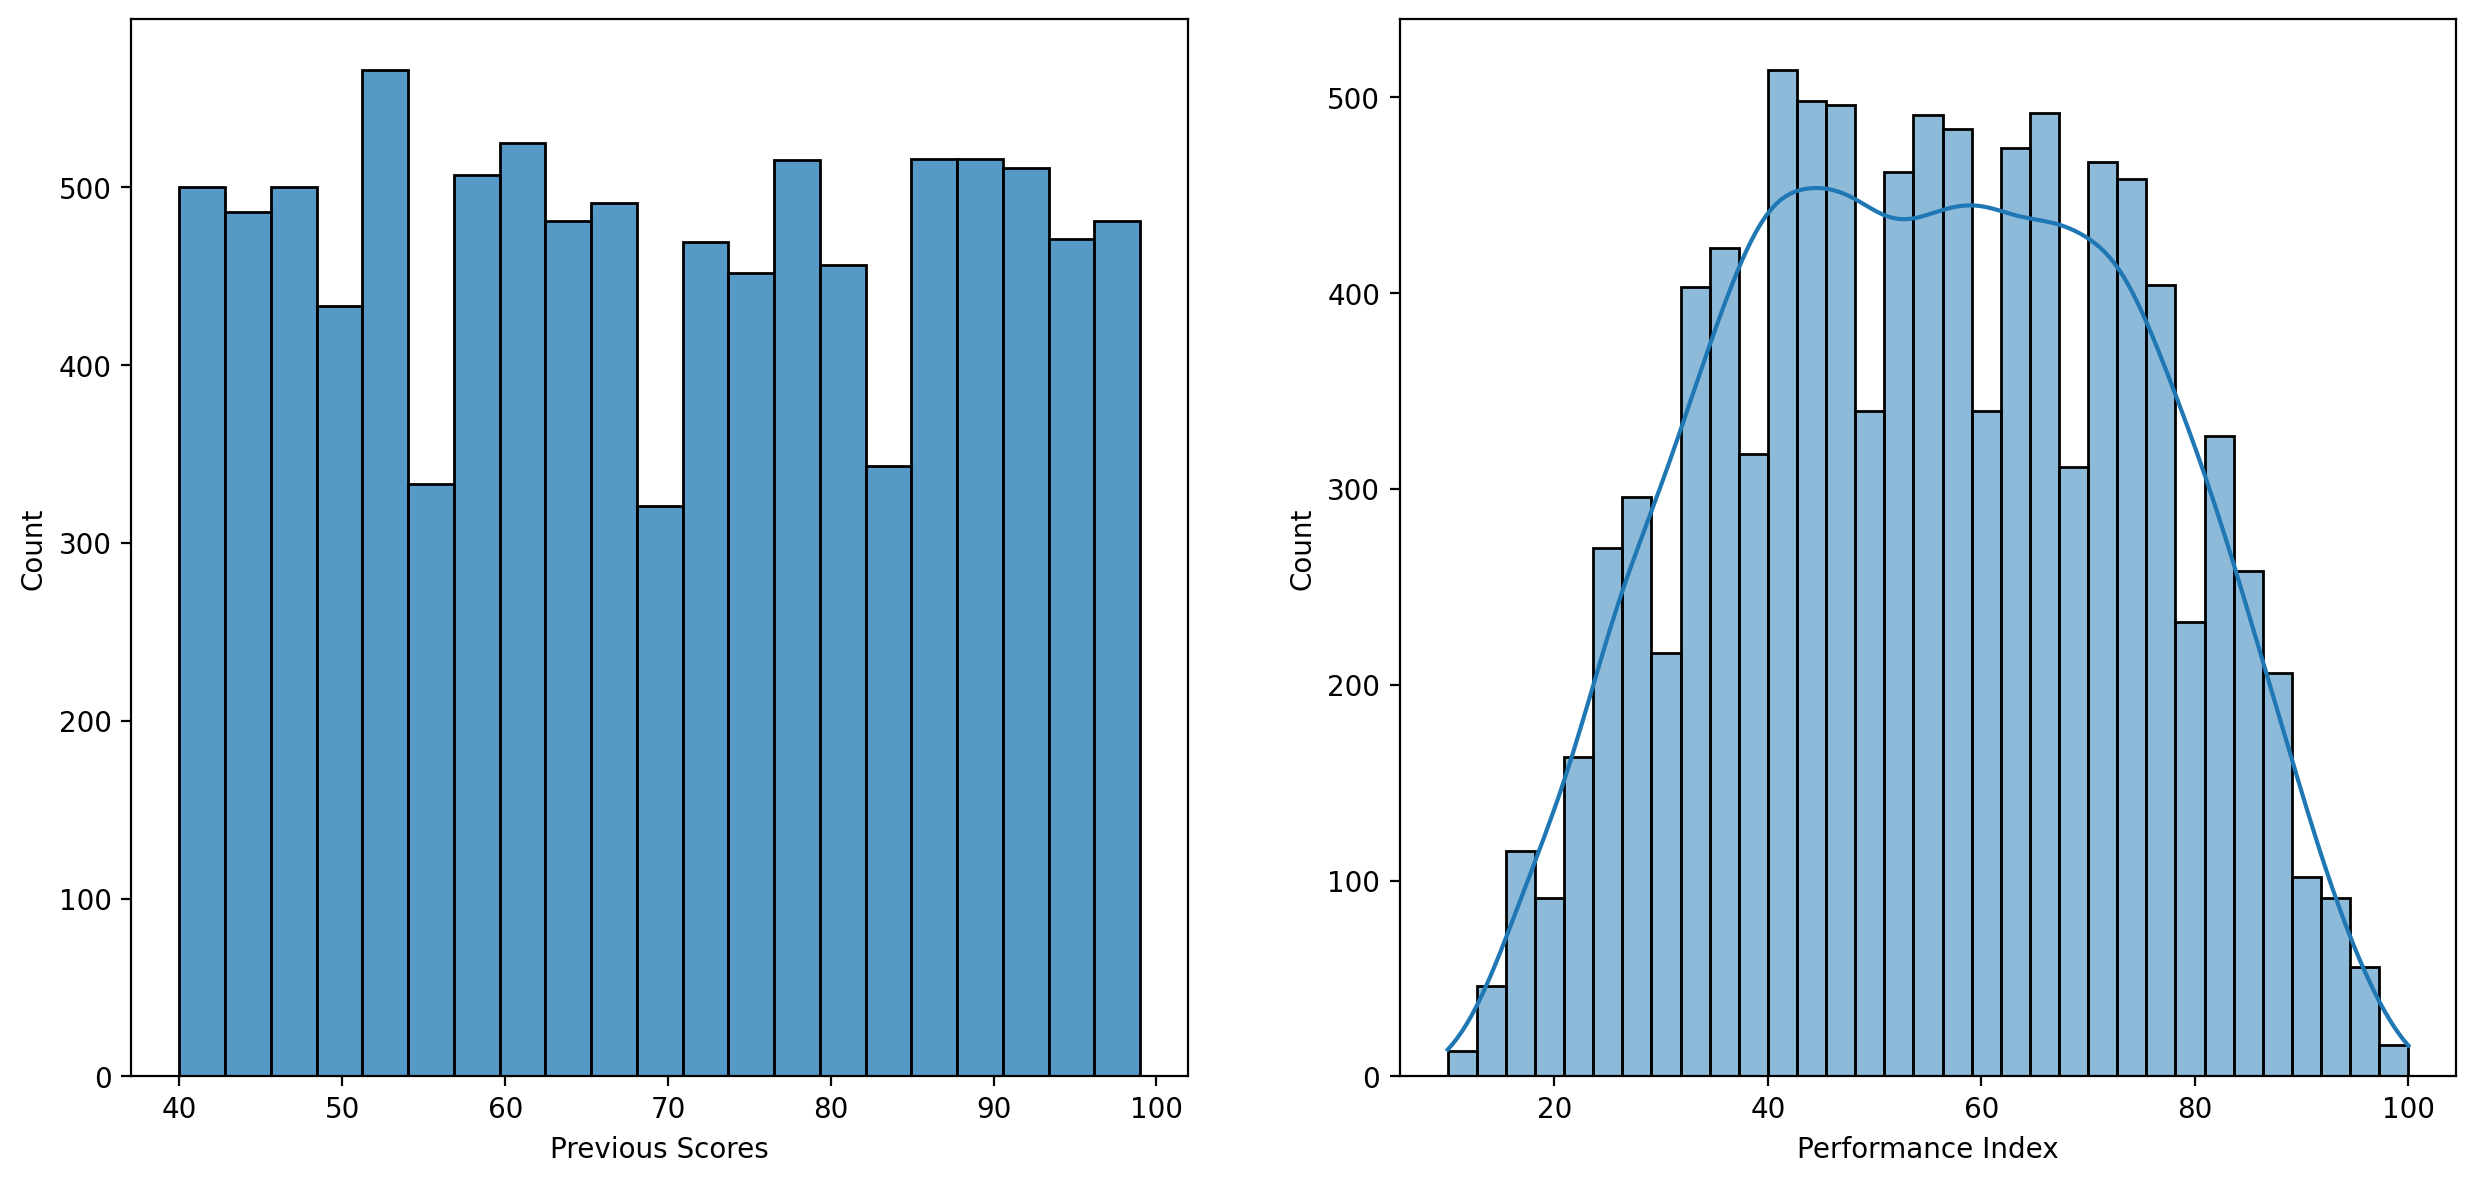

In [15]:
plt.figure(figsize=(15,7), dpi=200)
plt.subplot(1,2,1)
sns.histplot(x='Previous Scores', data=df)

plt.subplot(1,2,2)
sns.histplot(x='Performance Index', data=df,kde=True)

##  Insight:

**The Previous score does not really follow a pattern, but I can see that I have more student scoring around 52 and 85**

**This also does not really follow a pattern, but I can see that I have more student having their score distributed around 45**

<AxesSubplot:xlabel='Hours Studied', ylabel='Previous Scores'>

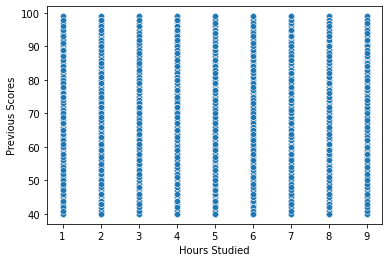

In [16]:
#Relationship Between the hours studied and Previous Scores
sns.scatterplot(df['Hours Studied'], df['Previous Scores'])

<AxesSubplot:xlabel='Hours Studied', ylabel='Previous Scores'>

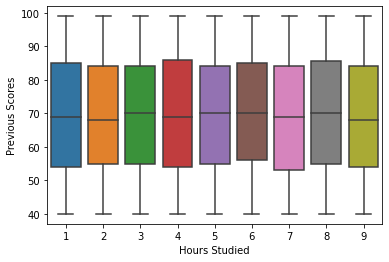

In [17]:
sns.boxplot(x='Hours Studied',y='Previous Scores', data=df)

In [18]:
df.groupby('Hours Studied').mean()[['Previous Scores']].sort_values('Previous Scores', ascending=False)

,Previous Scores
Hours Studied,
8,69.923650
6,69.888592
4,69.873950
5,69.709074
3,69.669369
1,69.500441
2,69.296193
7,68.669052
9,68.465878


<AxesSubplot:xlabel='Extracurricular Activities', ylabel='count'>

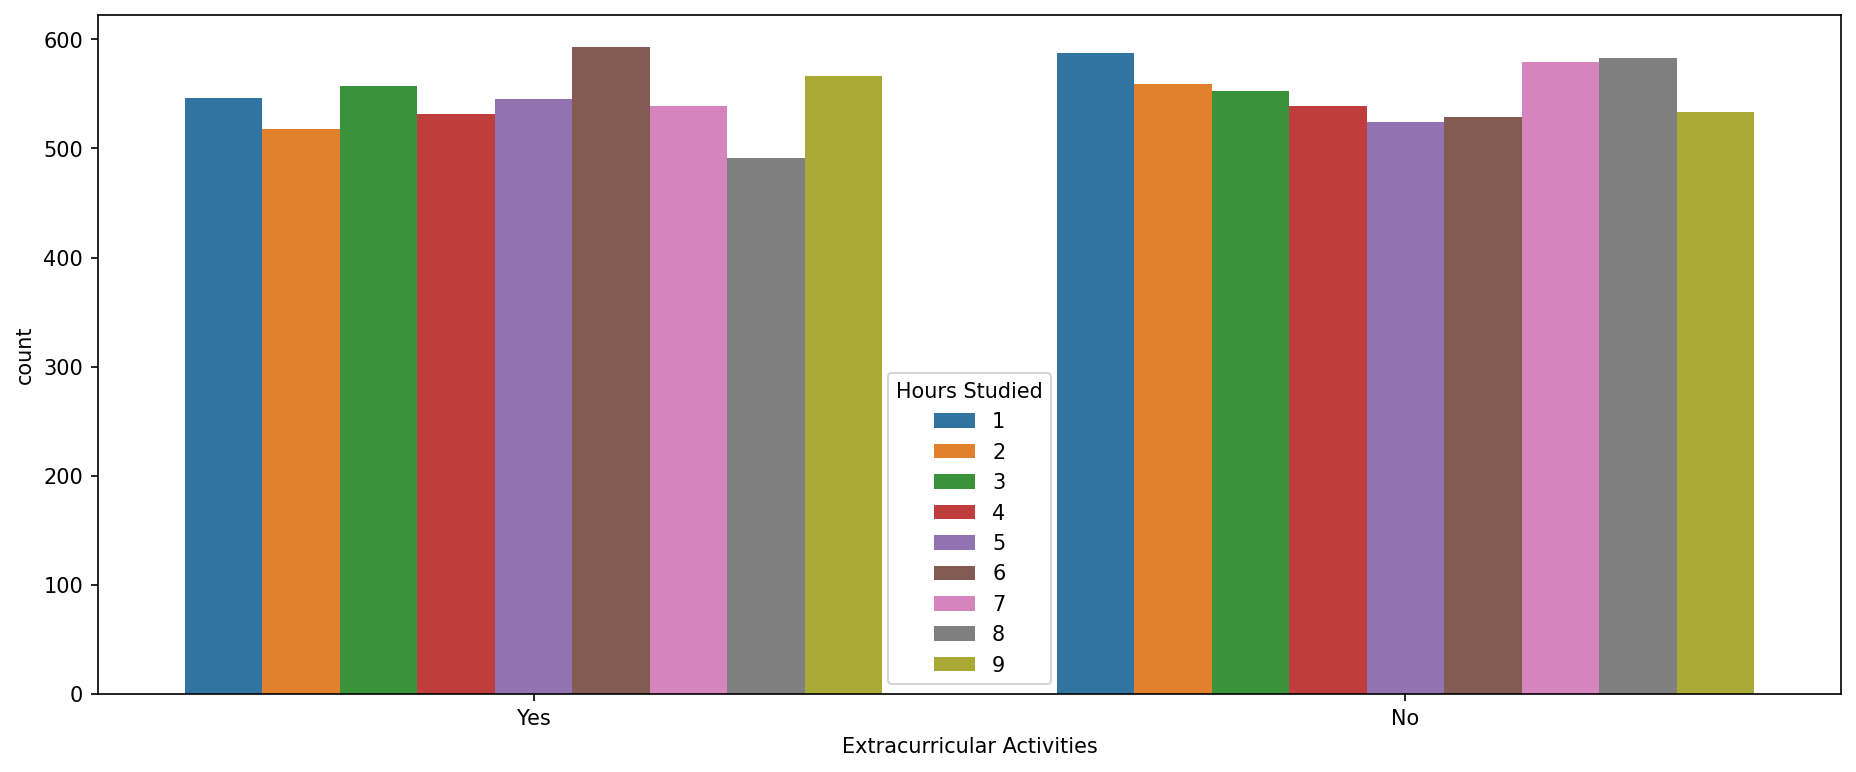

In [19]:
#Relationship between Hours studied and Extracurricular activities
plt.figure(figsize=(15,6),dpi=150)
sns.countplot(x='Extracurricular Activities', data=df, hue='Hours Studied')

In [20]:
df.groupby('Extracurricular Activities').mean()[['Hours Studied']]

,Hours Studied
Extracurricular Activities,
No,4.979543
Yes,5.004911


In [21]:
#Relationship between Hours Studied and Sample Question Papers Practised
df.groupby('Hours Studied').mean()[['Sample Question Papers Practiced']].sort_values('Sample Question Papers Practiced')

,Sample Question Papers Practiced
Hours Studied,
3,4.456757
8,4.506518
2,4.541318
1,4.557811
6,4.571301
5,4.574369
7,4.614490
4,4.642390
9,4.782530


<AxesSubplot:ylabel='Hours Studied'>

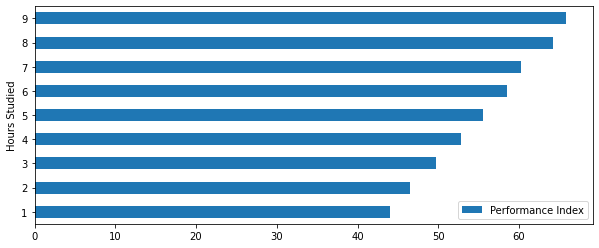

In [22]:
#Relationship between Hour studied and the Performance index
df.groupby('Hours Studied').mean()[['Performance Index']].plot(kind='barh', figsize=(10,4))

<AxesSubplot:xlabel='Hours Studied', ylabel='Performance Index'>

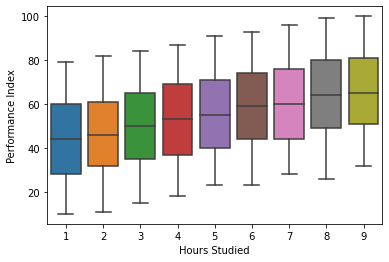

In [23]:
sns.boxplot(x='Hours Studied', data=df, y='Performance Index')

## Insight:
**In my analysis with the number of hour studied with other features. I saw that there was no much insight to draw out from the relationship with the previous scores, extracurricular insight, sleep Hours and Sample Question Papers Practiced**

**However there is a pattern I saw in the number of Hours Studied and the performance score(our target). The higher the number of hours you studied, the better you perform**


<AxesSubplot:xlabel='Extracurricular Activities', ylabel='Previous Scores'>

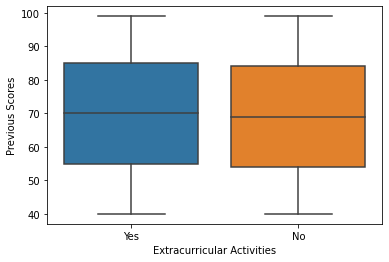

In [24]:
#Relationship between extracurricular activities and previous scores
sns.boxplot(x='Extracurricular Activities', y='Previous Scores', data=df)

In [25]:
df.groupby('Extracurricular Activities').mean()[['Previous Scores']]

,Previous Scores
Extracurricular Activities,
No,69.277577
Yes,69.607939


<AxesSubplot:xlabel='Sleep Hours', ylabel='Previous Scores'>

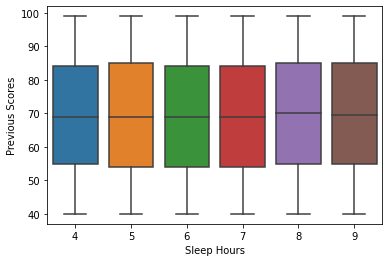

In [26]:
sns.boxplot(x='Sleep Hours', y='Previous Scores', data=df)

<AxesSubplot:xlabel='Previous Scores', ylabel='Performance Index'>

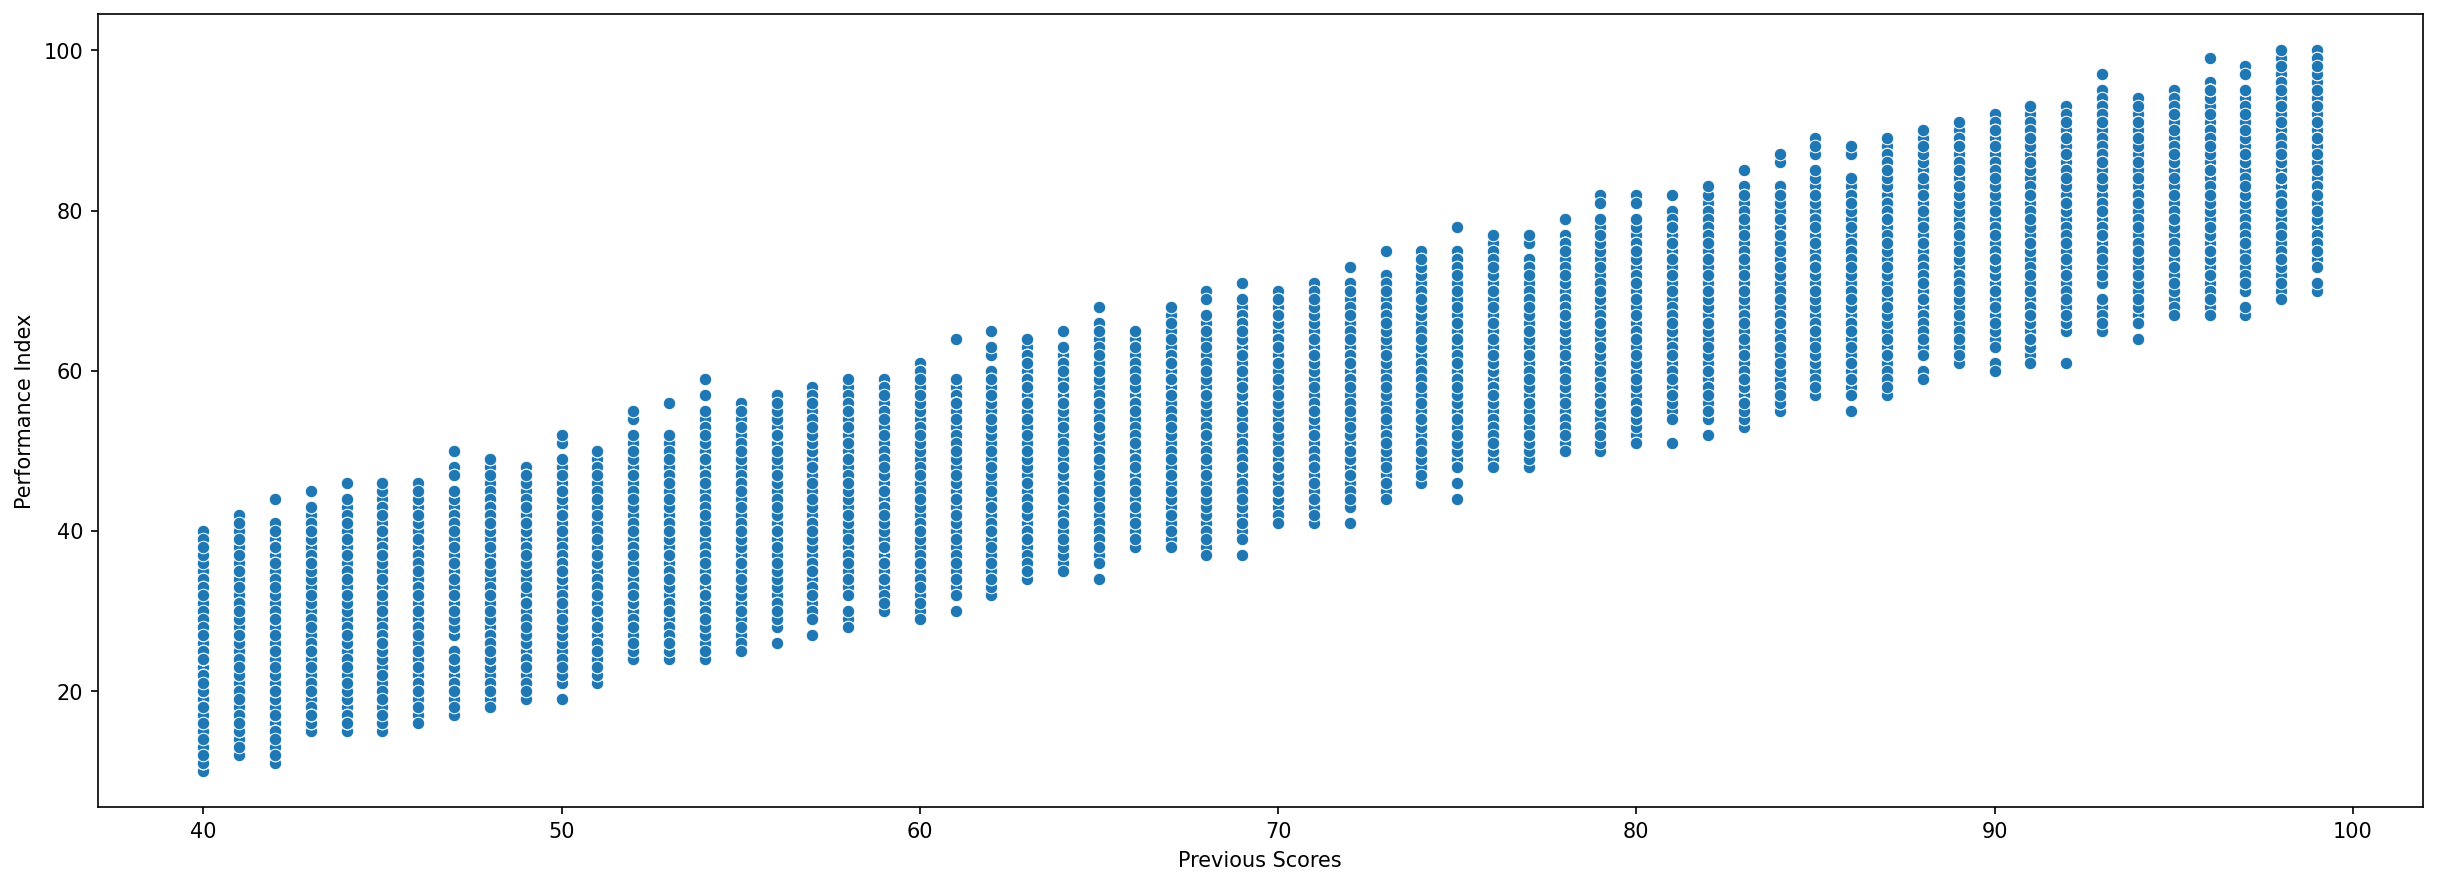

In [27]:
#Relationship between Previous scores and Performance index
plt.figure(figsize=(20,7) , dpi=150)
sns.scatterplot(x='Previous Scores' , y='Performance Index', data=df)

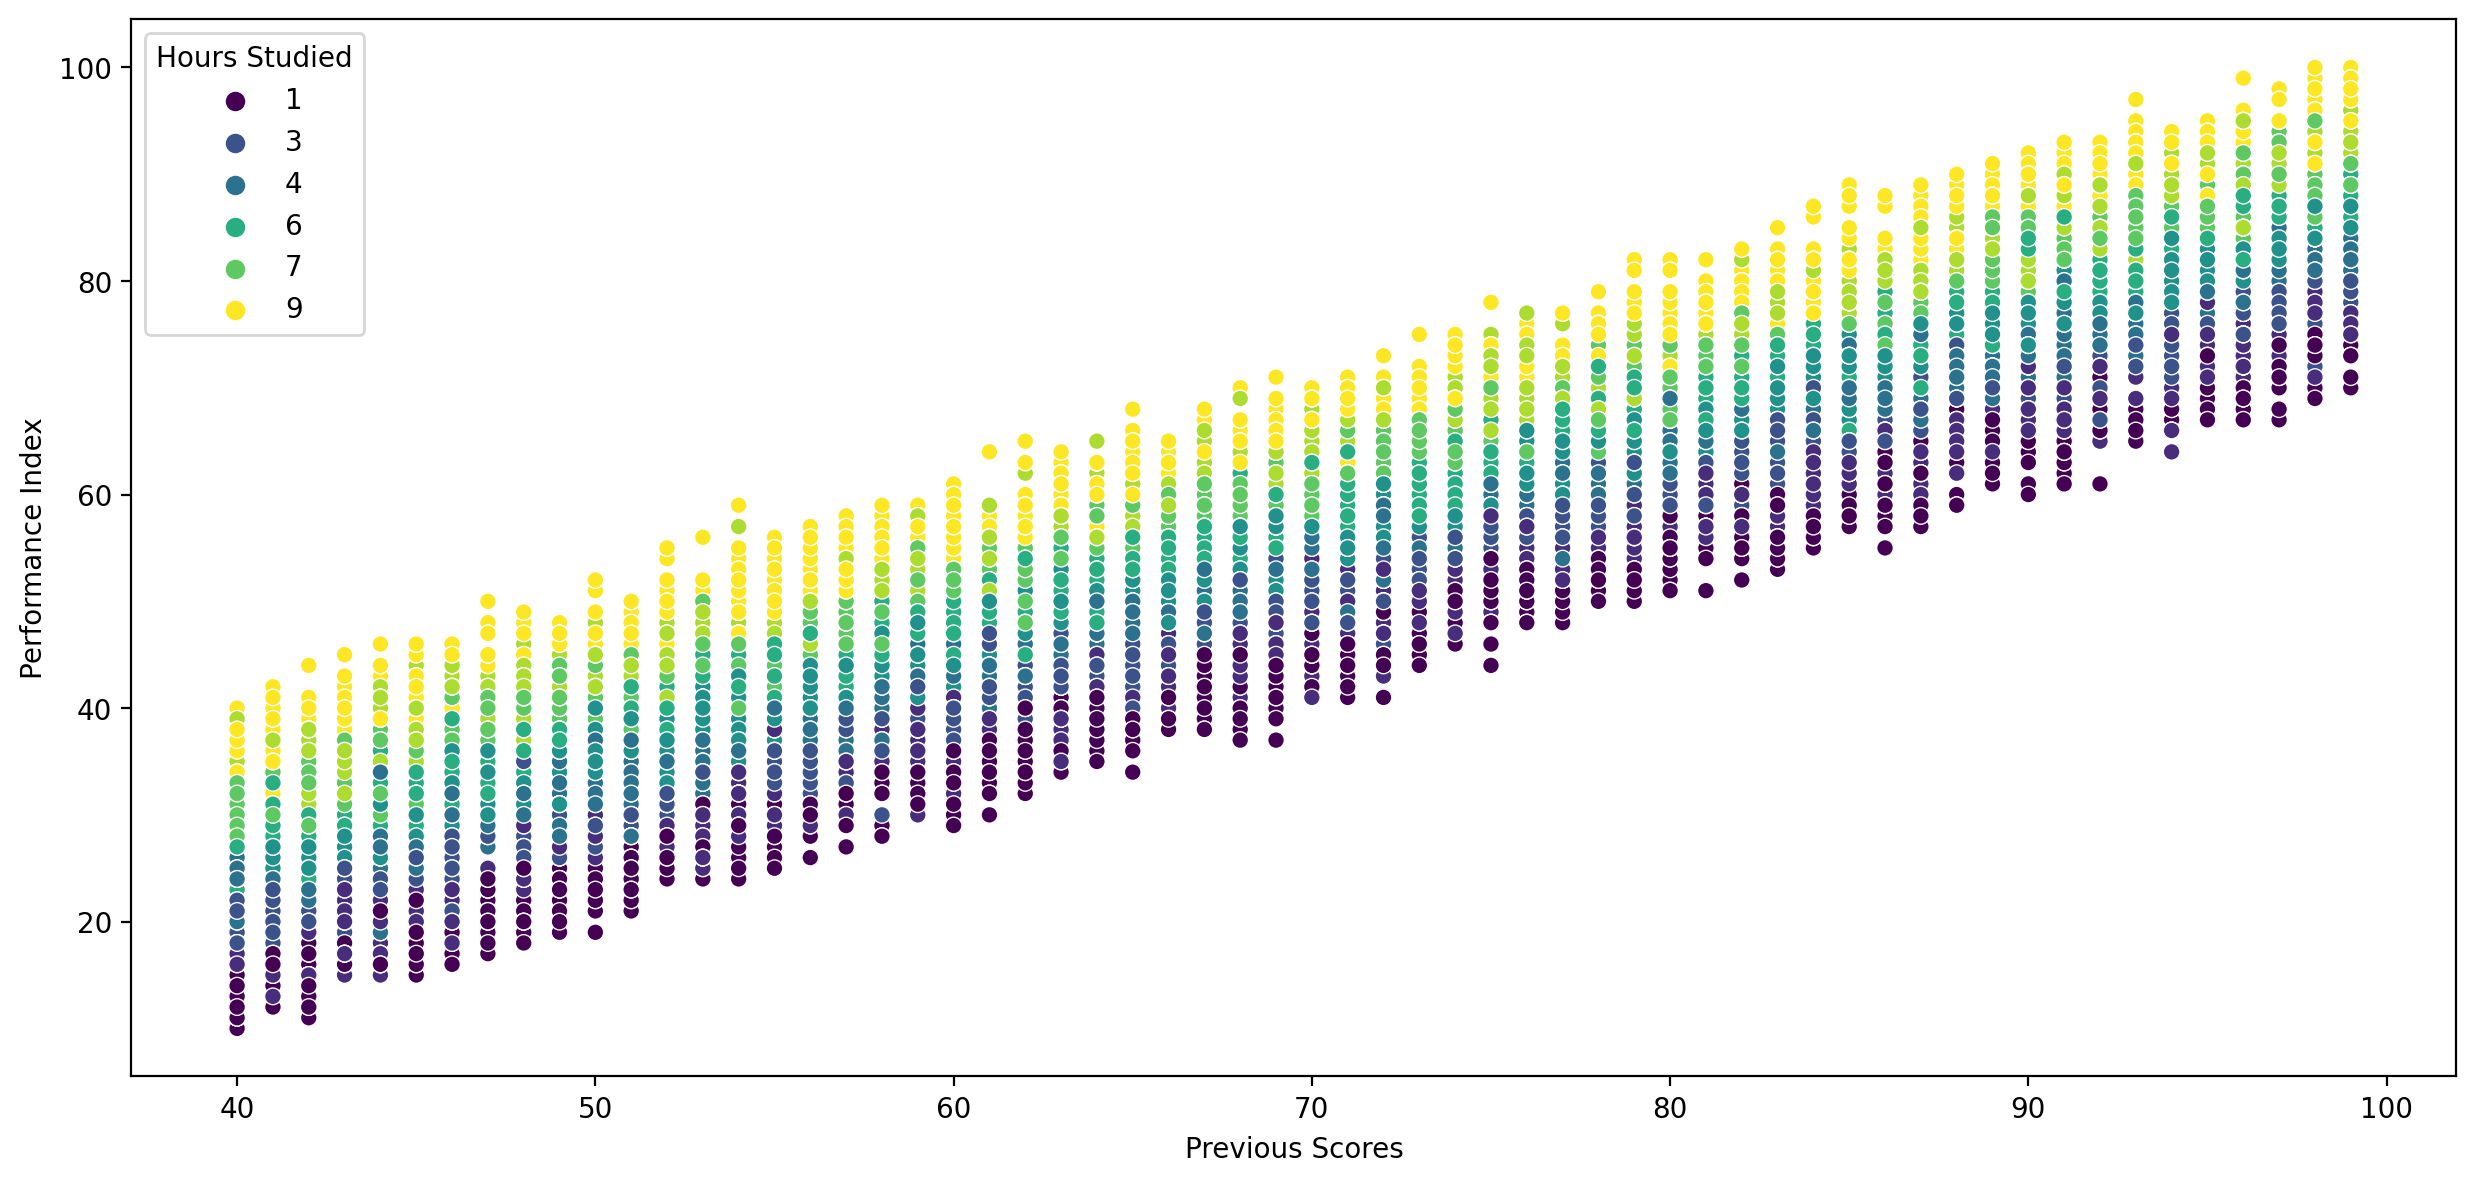

In [28]:
plt.figure(figsize=(15,7), dpi=200)
sns.scatterplot(x='Previous Scores' , y='Performance Index', data=df, hue='Hours Studied', palette='viridis');

## Insight

**from the above I can see that student that perform better in their Previous scores, have a good performance index**

**The Student that have a good performance index and previous score tends to study for more hours**

<AxesSubplot:xlabel='Extracurricular Activities', ylabel='Sample Question Papers Practiced'>

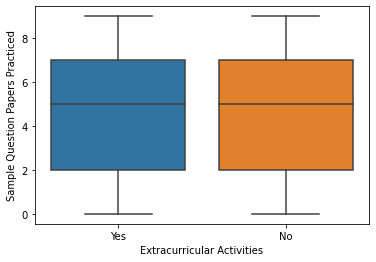

In [29]:
sns.boxplot(x='Extracurricular Activities', y='Sample Question Papers Practiced', data=df)

<AxesSubplot:xlabel='Extracurricular Activities', ylabel='Performance Index'>

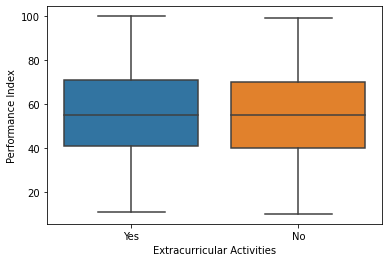

In [30]:
sns.boxplot(x='Extracurricular Activities', y='Performance Index', data=df)

<AxesSubplot:xlabel='Sleep Hours', ylabel='Performance Index'>

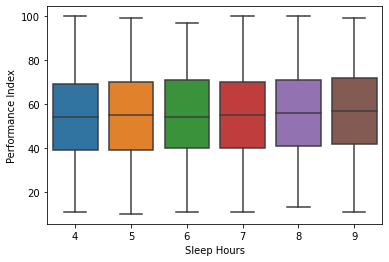

In [31]:
#Relationship between Sleep Hours and Performance Index
sns.boxplot(x='Sleep Hours', y='Performance Index', data=df)

<AxesSubplot:>

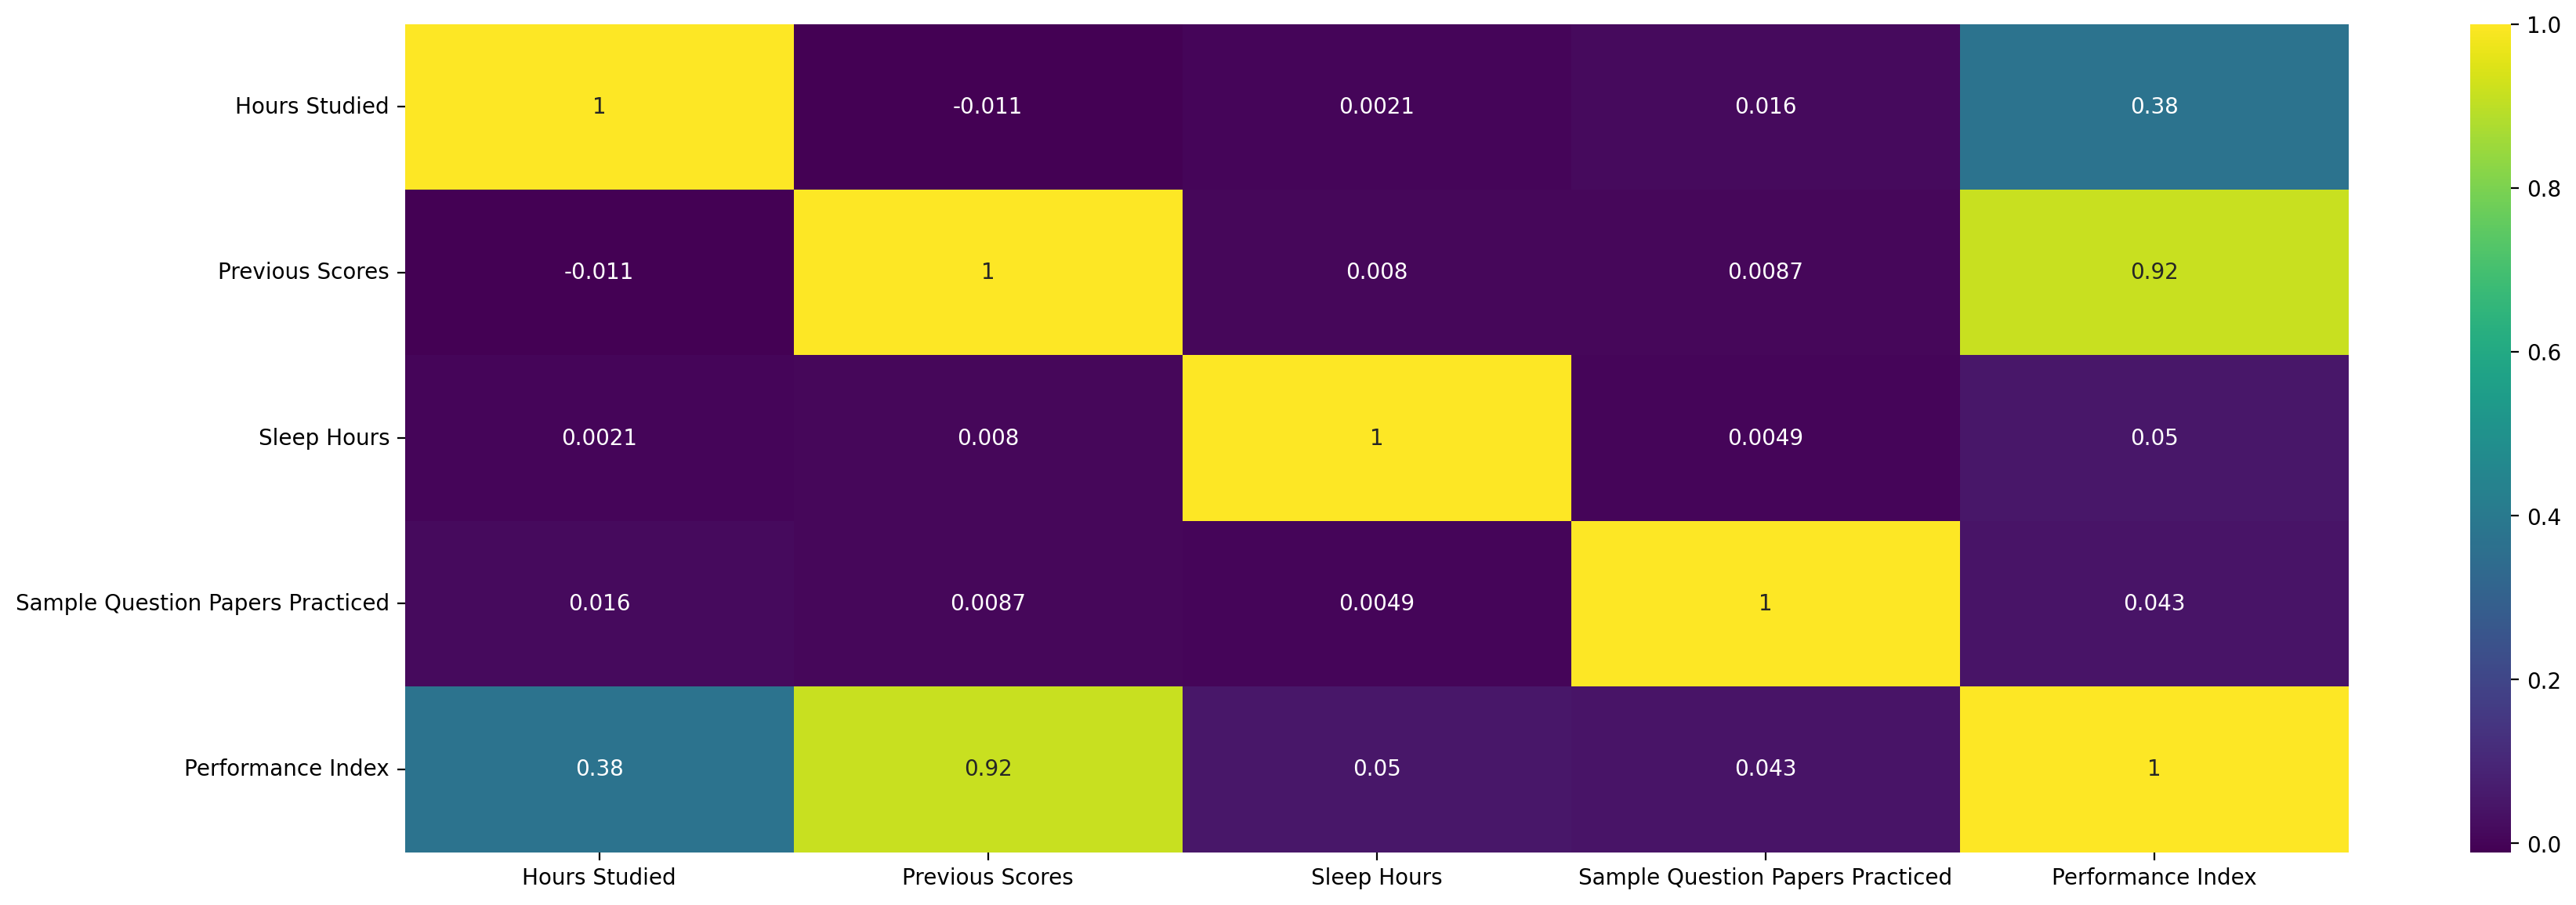

In [32]:
plt.figure(figsize=(20,7), dpi=200)
sns.heatmap(df.corr(), annot=True, cmap='viridis')

In [33]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [34]:
label = LabelEncoder()

In [35]:
df['Extracurricular Activities'].value_counts()

No     4986
Yes    4887
Name: Extracurricular Activities, dtype: int64

In [36]:
df['Extracurricular Activities'] = label.fit_transform(df['Extracurricular Activities'])

In [37]:
df['Extracurricular Activities'].value_counts()

0    4986
1    4887
Name: Extracurricular Activities, dtype: int64

In [38]:
df = df.rename(columns={'Hours Studied':'Hours_studied','Previous Scores':'Previous_Scores',
                       'Extracurricular Activities':'Extracurricular_Activities','Sleep Hours':'Sleep_Hours',
                       'Sample Question Papers Practiced':'Sample_Question_Papers_Practiced',
                       'Performance Index':'Performance_Index'})

In [39]:
df.head()

,Hours_studied,Previous_Scores,Extracurricular_Activities,Sleep_Hours,Sample_Question_Papers_Practiced,Performance_Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [40]:
X = df.drop('Performance_Index', axis=1)
y = df['Performance_Index']

In [41]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [42]:
## Apply SelectKbest Algorithm
ordered_rank_features = SelectKBest(score_func=chi2,k=5)
ordered_feature = ordered_rank_features.fit(X,y)

In [43]:
ordered_feature.scores_

array([ 2718.04204791, 36332.22665265,    61.35077678,    54.14984336,
         182.3190428 ])

In [44]:
pd.DataFrame(ordered_feature.scores_, columns=['scores'], index=X.columns).sort_values('scores')

,scores
Sleep_Hours,54.149843
Extracurricular_Activities,61.350777
Sample_Question_Papers_Practiced,182.319043
Hours_studied,2718.042048
Previous_Scores,36332.226653


In [45]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [47]:
scaler =StandardScaler()

In [48]:
X_train_scaler = scaler.fit_transform(X_train)

In [49]:
X_test_scaler = scaler.transform(X_test)

In [50]:
X_train_scaler.std()

1.0

In [51]:
def baseline_model(model,x_train,y_train):
    cv = cross_val_score(model,x_train,y_train,cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    
    score = np.sqrt(np.mean(-cv))
    
    return round(score,2)

In [52]:
lr = LinearRegression()

In [53]:
baseline_model(lr,X_train_scaler,y_train)

2.03

In [54]:
knn = KNeighborsRegressor()

In [55]:
baseline_model(knn,X_train,y_train)

2.54

In [56]:
tree = DecisionTreeRegressor()

In [57]:
baseline_model(tree,X_train,y_train)

3.07

In [58]:
rf_model =RandomForestRegressor()

In [59]:
baseline_model(rf_model,X_train,y_train)

2.35

In [60]:
xgb =XGBRegressor()

In [61]:
baseline_model(xgb,X_train,y_train)

2.29

In [62]:
lgbm =LGBMRegressor()

In [63]:
baseline_model(lgbm,X_train,y_train)

2.13

In [64]:
catboost =CatBoostRegressor()

In [65]:
baseline_model(catboost,X_train,y_train)

2.13

In [66]:
model = pd.DataFrame(data=['Linear Regression','knn','Decision Tree', 'Random Forest','Xgboost','Catboost','lightgbm'], columns=['Model'])

In [67]:
rmse = [2.03,2.54, 3.08,2.35,2.29,2.13,2.13 ]

In [68]:
rmse = pd.DataFrame(rmse, columns=['RMSE'])

In [69]:
baseline_rmse = pd.concat([model,rmse], axis=1)

In [70]:
baseline_rmse.sort_values('RMSE')

,Model,RMSE
0,Linear Regression,2.03
5,Catboost,2.13
6,lightgbm,2.13
4,Xgboost,2.29
3,Random Forest,2.35
1,knn,2.54
2,Decision Tree,3.08


In [73]:
linear_model =LinearRegression()

In [74]:
linear_model.fit(X_train_scaler,y_train)

LinearRegression()

In [75]:
predict = linear_model.predict(X_test_scaler)

In [76]:
predict

array([46.47091936, 80.24923008, 61.02996578, ..., 29.51491428,
       51.34505597, 64.87860811])

In [77]:
linear_model.coef_

array([ 7.37313051, 17.65623871,  0.27839863,  0.80147322,  0.55465062])

<AxesSubplot:>

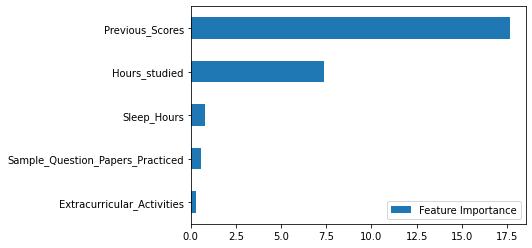

In [84]:
pd.DataFrame(linear_model.coef_, index=X.columns, columns=['Feature Importance']).sort_values('Feature Importance').plot(kind='barh')

In [85]:
from sklearn.pipeline import Pipeline

In [86]:
pipe = Pipeline(
    steps=[
        ('scaler',StandardScaler()),
        ('linear_regression', LinearRegression())
    ]
)

In [87]:
pipe.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_regression', LinearRegression())])

In [98]:
import joblib

In [99]:
joblib.dump(pipe,'final_model.pkl')

['final_model.pkl']

In [101]:
model = joblib.load('final_model.pkl')

In [102]:
df.head(3)

,Hours_studied,Previous_Scores,Extracurricular_Activities,Sleep_Hours,Sample_Question_Papers_Practiced,Performance_Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0


In [103]:
model.predict([[8,51,1,7,2]])

array([45.05396752])